# Getting started with data science in Web3

by [Daniel Zakrisson](https://twitter.com/danielzak) at [Scaleout](https://www.scaleoutsystems.com)  
  
Good data science and machine learning is dependent on data. Up until recently it was very cumbersome to access indexed blockchain data (on-chain data) and only a small number of teams and people had access to the tools and infrastructure to do this at scale.  
  
With the release of new infrastructure at the data layer, such as the Graph, the data layer has been unbundled, and data access is no longer dependent on infrastructure or large indexing systems.  
  
This will be a number of examples that help data scientists and machine learning developers get started with blockchain data using Python, the Graph data and various data science and machine learning tools.

## Data from The Graph

The first step is to use the Graph to access to up to date, indexed on-chain data. Data is accessed through subgraphs, where each subgraphs can be thought of as a database containing a specific subset of all on-chain data.  
  
Each subgraphs has its own schema, which can be found and explored through the Graph Explorer at [thegraph.com/explorer](https://thegraph.com/explorer/).  
  
The first step in any project will be to find the data of interest and then building a query for this data. The following is an example using the Uniswap v2 subgraph to access ether price data.

In [20]:
# step 1 - imports that will be used in this example
import requests
import json
import numpy as np

from datetime import datetime
import matplotlib.pyplot as plt

In [21]:
# step 2 - subgraph data
# Subgraph ID: QmWTrJJ9W8h3JE19FhCzzPYsJ2tgXZCdUqnbyuo64ToTBN
# Subgraph URL: https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2

# Data generated from TheGraph Uniswap v2 public, hosted API at https://thegraph.com/explorer/subgraph/uniswap/uniswap-v2
# Token ID for WETH: 0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
# Token ID for WBTC: 0x2260fac5e5542a773aa44fbcfedf7c193bc2c599

# Sample GraphQL query:
# Daily price data for WETH in USD. Change the token ID e.g. to WBTC above to test another token.

query = """query {
    tokenDayDatas(first:1000, where: {token: "0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2"}, orderBy: date, orderDirection: desc) {
      date
      priceUSD
    }
}"""

# Call the public hosted TheGraph endpoint
url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2'
r = requests.post(url, json={'query': query})
print(r.status_code)


200


In [22]:
# step 3 - save data to Numpy array
# The request returns a json structured string. First we transform the string into a json object:
json_data = json.loads(r.text)

# Next step is to convert the json object to an array, there are many ways to do this. Here is one 
# example that iterates over the data and converts it into float numbers (the price) and datetime objects 
# (the timestamps) while appending it to an initally empty array.

# Create an empty Numpy array
arr = np.empty((0,2), int)

# Populate the Numpy array, while converting Unix timestamps to datetime objects, and price to float numbers
for l in json_data['data']['tokenDayDatas']:
    arr = np.append(arr, np.array([[datetime.fromtimestamp(l['date']), np.float(l['priceUSD'])]]), axis=0)
    

# Now you have the data in a Numpy array, and you can basically do anything with it. Explore with Numpy and SciPy, or SciKitLearn for machine learning.

Text(0, 0.5, 'usd')

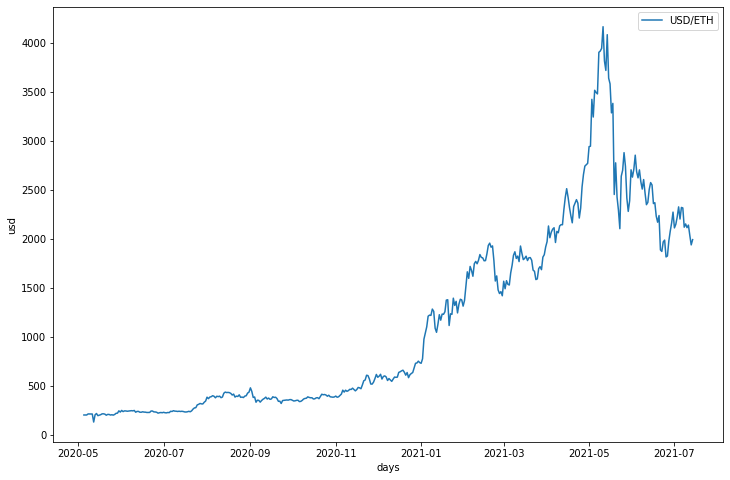

In [23]:
# step 4 - plot the data
f, ax = plt.subplots(1,1,figsize=(12,8))
ax.plot((arr[:,0]),arr[:,1], label='USD/ETH' )
ax.legend()
ax.set_xlabel('days')
ax.set_ylabel('usd')
#ax.set_yscale('log')

In [24]:
# step 4 - some people prefer to work with data in Pandas instead.

import pandas as pd

df = pd.DataFrame(arr, columns=['Date','Price'])

pd.set_option("display.max_rows", 10, "display.max_columns", None)
print(df)

          Date        Price
0   2021-07-14   1992.46681
1   2021-07-13  1938.987847
2   2021-07-12  2035.935734
3   2021-07-11  2141.075595
4   2021-07-10  2115.008568
..         ...          ...
429 2020-05-11   211.270007
430 2020-05-08   212.096624
431 2020-05-07   201.358662
432 2020-05-06   201.358458
433 2020-05-05   201.486251

[434 rows x 2 columns]


In [25]:
# With the TheGraph data in a Numpy array or Pandas dataframe the sky is the limit for what can be done next.